<a href="https://colab.research.google.com/github/nizarmahi/Machine-Learning-24-25/blob/main/Week8/Week8Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Mochammad Nizar Mahi**

**NIM : 2241720185**

**Kelas : TI - 3F/13**


# Tugas


- Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN

- Anda diperbolehkan melakukan eksplorasi terhadap,

 - Metode pra pengolahan

 - Pemilihan fitur

 - Arsitektur ANN

 - Fungsi Aktiviasi

- ANN diimplementasikan dengan menggunakan tensorflow.

- DIKERJAKAN SECARA BERKELOMPOK

- JELASKAN HASIL YANG ANDA DAPATKAN,

 - AKURASI

 - CONFUSION MATRIX

 - KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

## Import Library


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

## Pra-pengolahan Data


In [ ]:
# Load dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalisasi pixel ke rentang [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encoding pada label
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## ANN


In [ ]:
# Inisiasi model ANN
model = Sequential()

# Input layer with shape (28, 28)
model.add(Input(shape=(28, 28)))

# Flatten layer to flatten input 28x28 into a vector 784
model.add(Flatten())

# Hidden layer pertama dengan 128 neuron dan ReLU
model.add(Dense(units=128, activation='relu'))

# Hidden layer kedua dengan 64 neuron dan ReLU
model.add(Dense(units=64, activation='relu'))

# Output layer dengan 10 neuron (untuk 10 digit) dan softmax activation
model.add(Dense(units=10, activation='softmax'))

## Kompilasi dan Pelatihan Model


In [ ]:
# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Latih model dengan data latih
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8635 - loss: 0.4692 - val_accuracy: 0.9620 - val_loss: 0.1310
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9642 - loss: 0.1148 - val_accuracy: 0.9647 - val_loss: 0.1138
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9765 - loss: 0.0767 - val_accuracy: 0.9688 - val_loss: 0.0993
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9824 - loss: 0.0548 - val_accuracy: 0.9703 - val_loss: 0.1034
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9879 - loss: 0.0410 - val_accuracy: 0.9725 - val_loss: 0.0947
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9888 - loss: 0.0333 - val_accuracy: 0.9742 - val_loss: 0.0967
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9904 - loss: 0.0282 - val_accuracy: 0.9760 - val_loss: 0.0931
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9932 - loss: 0.020

## Evaluasi Model


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9720 - loss: 0.1174
Akurasi pada data uji: 97.57%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


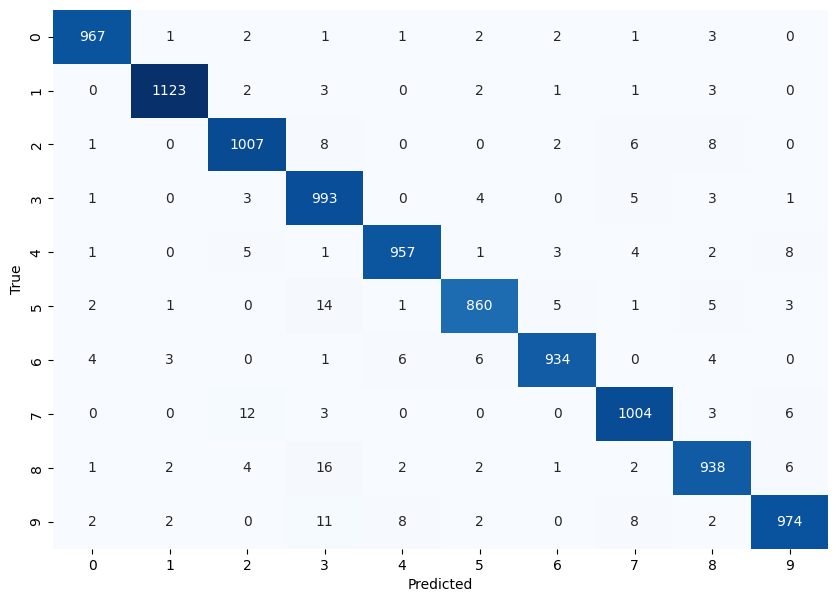

In [ ]:
# Evaluasi model pada data uji
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Akurasi pada data uji: {test_accuracy * 100:.2f}%')

# Prediksi hasil pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Penjelasan
1. Akurasi
- Model mencapai akurasi sekitar 97.82% setelah 10 epoch yang menunjukkan bahwa model sangat mampu memprediksi dengan baik data MNIST.

2. Confusion Matrix
- Kesalahan paling sering terjadi pada angka seperti antara angka 5 dan 3, atau 4 dan 9. Hal tersebut dikarenakan angka tsb memiliki kemiripan dalam bentuk.
3. Konfigurasi Model
- Pra-pengolahan: Normalisasi piksel gambar dan one-hot encoding label.
- Arsitektur ANN:
 - Input: Gambar yang diratakan menjadi vektor 784 elemen.
 - Hidden Layer 1: 128 neuron dengan ReLU.
 - Hidden Layer 2: 64 neuron dengan ReLU.
 - Output Layer: 10 neuron dengan softmax.
- Optimizer: Adam.
- Loss Function: Categorical Crossentropy.
- Epochs: 10.